  Разработать модель для предсказание количество цитирований публикации через 5 лет после момента выхода на тестовых данных. Оценить эффективность работы модели и влияние параметров на качество предсказаний.

  Исходные данные представлены в CSV формате. Каждая строка описывает публикацию, в колонках приведены разные показатели статьи. В колонке с именем "c5" записано искомое количество цитирований статьи через 5 лет после выхода. Именно это значение нужно предсказывать.
Файл с входными данными доступен для скачивания по ссылке:

 https://drive.google.com/file/d/16O04PRpsQrjcc6g_5skcLwOOeayv_xUr/view?usp=sharing

  В качестве решения должен быть предоставлен Jupyter notebook, содержащий код на языке программирования Python для решения поставленной задачи, который можно запустить с помощью команды Cell | Run All. Можно пользоваться всеми публично доступными библиотеками для машинного обучения.

  **Внимание!** Кроме предоставления ноутбука с решением необходимо создать файл для настройки пакетов Python в формате для conda или pip.


In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

print('Сейчас нужно будет загрузить файл "predict.csv"')
files.upload()

Сейчас нужно будет загрузить файл "predict.csv"


Saving predict.csv to predict (1).csv


{'predict.csv': b'recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,authors_mean_pagerank,authors_mean_productivity,journal_pagerank,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality\n16,1.0,-0.4254360928119162,500.0,1.0,1.0,6.0,,,,101.0,66,1653,7,1.0,1.9459101490553132\n8,7.0,-0.5719671271205441,134.0,1.0,1.0,6.0,,,,24.0,59,1527,7,32.0,1.9459101490553132\n15,19.0,-0.8596436755093858,235.0,1.0,1.0,5.0,,,,49.0,169,1554,6,5.0,1.791759469228055\n6,4.0,-1.0549991290745102,1124.0,1.0,1.0,10.0,,,,185.0,130,2121,11,7.0,2.3978952727983707\n14,2.0,-0.4766967849374994,346.0,1.0,1.0,2.0,,,,72.0,100,432,3,7.0,1.0986122886681096\n18,10.0,-1.1099817813006518,397.0,1.0,1.0,6.0,,,,87.0,110,923,7,5.0,1.9459101490553132\n7,2.0,-0.8348756912824138,1775.0,1.0,1.0,7.0,,,,126.0,70,853,8,1.0,2.0794415416798357\n9,14.0,-0.7005256966246584,570.0,1.0,1.0,4.0,,,,105.0,121,1234,5,6.0,1.6094379124341003\n5,3.0,-1.4640844002567945

In [3]:
df_vals = pd.read_csv('predict.csv')
df_vals = df_vals[['recency',	'topic_rank',	'diversity',	'authors_mean_rank',	'authors_mean_hindex',	
         'authors_mean_gindex',	'authors_mean_sociality',	'journal_rank',	
         'title_len',	'abstract_len',	'n_authors',	'c5',	'log_authors_mean_sociality']]

In [4]:
df = df_vals[~df_vals['authors_mean_hindex'].isnull()]
df = df_vals[~df_vals['authors_mean_gindex'].isnull()]
df = df_vals[~df_vals['authors_mean_sociality'].isnull()]
df = df_vals[~df_vals['journal_rank'].isnull()]

**Decision tree**

In [5]:
dff = diversity_target_success = df['diversity']

In [6]:
mean_diversity = 0
mean_diversity = np.mean(dff)

In [7]:
i = 0
for element in dff:
  if ( element < mean_diversity):
    diversity_target_success[i] = 0
  if (element >= mean_diversity):
    diversity_target_success[i] = 1
  i += 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/l

In [8]:
df['diversity_target_success'] = diversity_target_success

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.to_csv("processedData.csv",index=False)

In [10]:
task_data = df.head(440) #отделение нужного куска таблицы

In [11]:
train = task_data.head(int(len(task_data)*0.8))  #выборка
test = task_data.tail(int(len(task_data)*0.2))

In [12]:
features = list(train.columns[7:10])
x = train[features]
y = train['diversity_target_success']

In [13]:
train.columns[6:7]

Index(['authors_mean_sociality'], dtype='object')

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=100, #максимальное число листьев
                              random_state=2021)
clf=tree.fit(x, y)

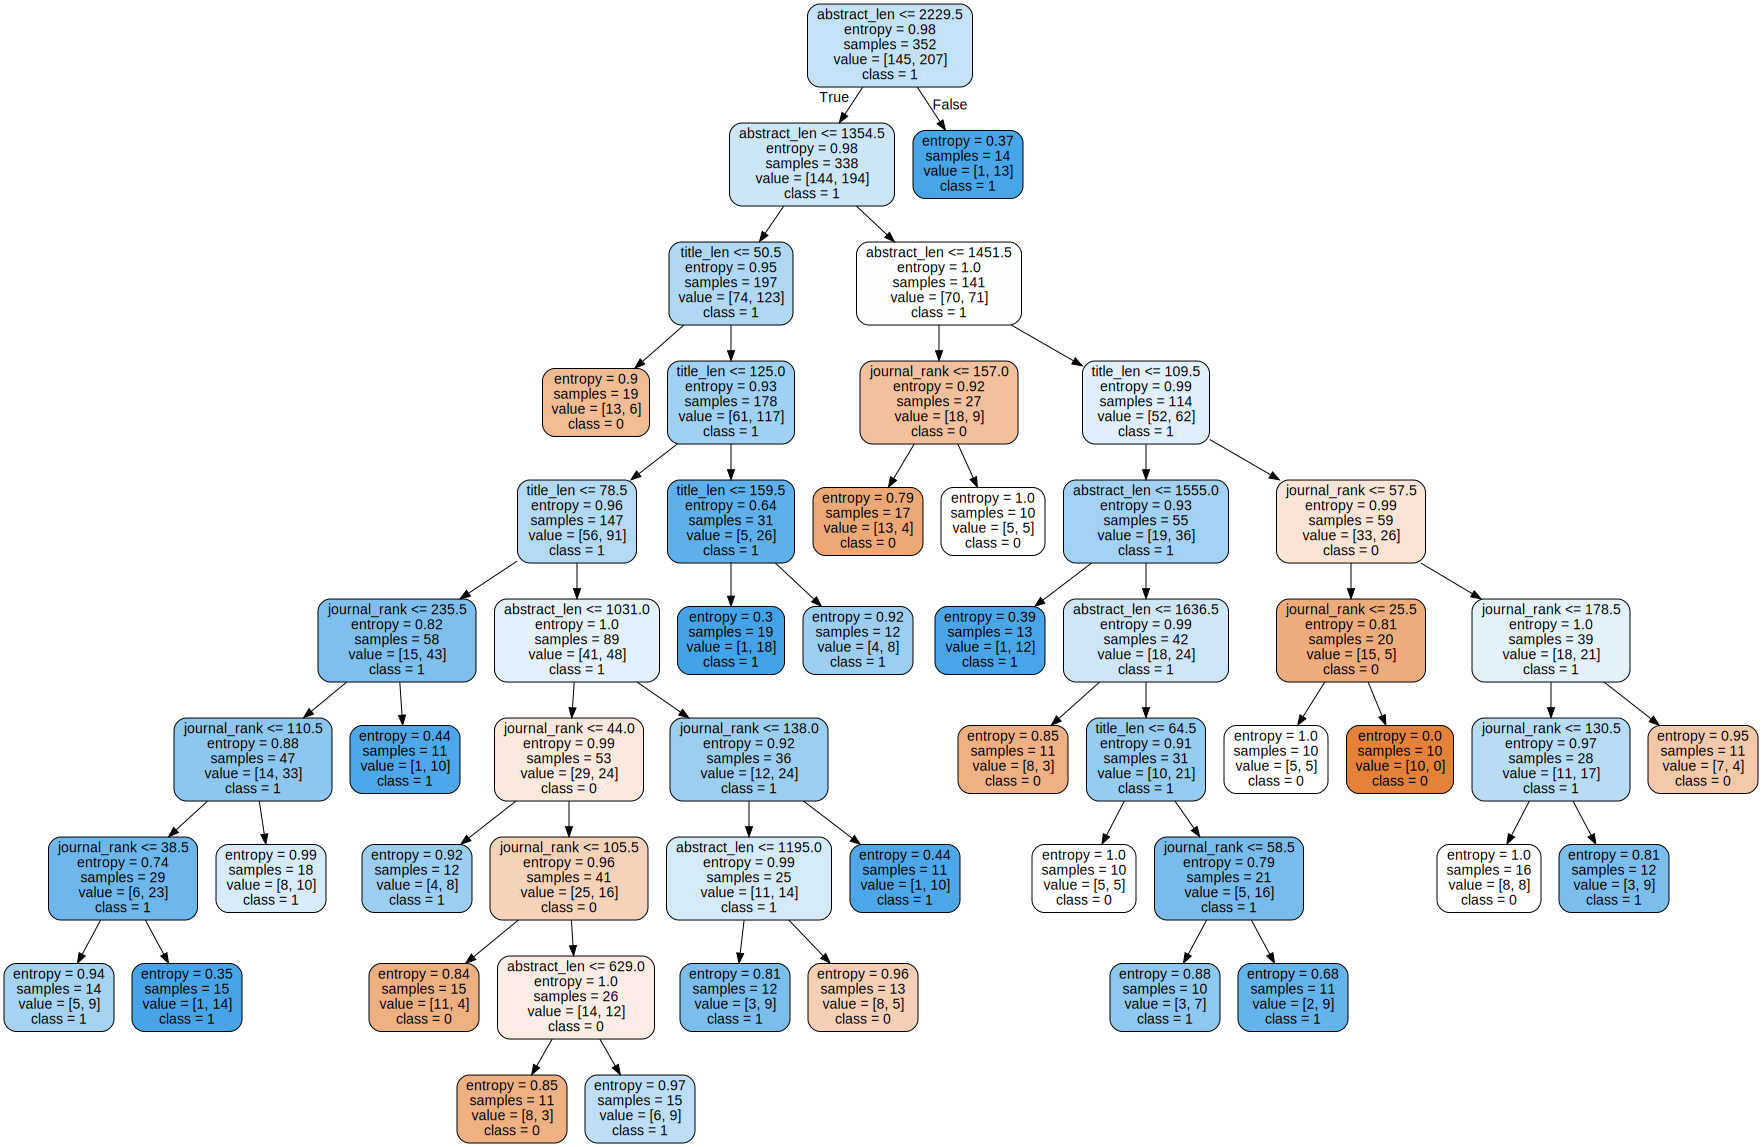

In [15]:
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [16]:
clf.tree_.max_depth

9

In [24]:
features = list(test.columns[7:10])
x = test[features]
y_true = test['diversity_target_success']
y_pred = clf.predict(x)

**Logical regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from google.colab import files
import io
from sklearn import metrics

In [19]:
features = list(train.columns[7:10])
x = train[features]
y = train['diversity_target_success']

In [20]:
#обучение модели
reg = LogisticRegression(random_state=2021, solver='lbfgs').fit(x, y.values.ravel())

In [21]:
uploaded = files.upload()
uploaded = pd.read_csv(io.BytesIO(uploaded['processedData.csv']), delimiter=',', index_col='diversity_target_success')

Saving processedData.csv to processedData (1).csv


In [22]:
publication_for_test = df.loc[1,:].to_frame().T
result = reg.predict_proba(publication_for_test.drop(['recency',	'topic_rank',	'diversity',	'authors_mean_rank',	'authors_mean_hindex',	
         		'title_len', 'diversity_target_success',	'abstract_len',	'n_authors',	'c5',	'log_authors_mean_sociality'], axis=1))

print('publication 1')
print('Unsuccess -', round(result[0][0], 3))
print('Success -', round(result[0][1], 3))

publication 1
Unsuccess - 0.498
Success - 0.502


In [23]:
xTest = pd.DataFrame(publication_for_test.drop(['diversity_target_success'], axis=1))
yPred = reg.predict(xTest.drop(['recency',	'topic_rank',	'diversity',	'authors_mean_rank',	'authors_mean_hindex',	
         		'title_len', 'abstract_len',	'n_authors',	'c5',	'log_authors_mean_sociality'], axis=1))
yTrue = (publication_for_test['diversity_target_success'].to_frame().T).values.ravel()
recall = metrics.recall_score(yTrue, yPred)
precision = metrics.precision_score(yTrue, yPred)
print('Recall:', round(recall, 3))
print('Precision:', round(precision, 3))

Recall: 1.0
Precision: 1.0
